In [246]:
import pandas as pd
from pandas.io.pytables import DataIndexableCol
import matplotlib.pylab as plt
import seaborn as sns
import openpyxl
import xlsxwriter

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


In [247]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [248]:
path = '/content/drive/MyDrive/Colab Notebooks/Ti_le_mo/Hocmay_Tilemocothe.xlsx'

Read file

In [249]:
file = pd.ExcelFile(path)
file  = pd.DataFrame(file.parse(sheet_name= 'Sheet1'))

In [250]:
ID_People = ['TRUONG','LOP','MASO', 'A1HOVATE','Dân tộc']
Index_People = ['Giới tính', 'Chiều cao', 'Cân nặng', 'Vòng mông', 'Vòng eo', 'BMI2', 'Tỉ lệ mỡ cơ thể', 'Tỉ lệ cơ xương', 'Mỡ dưới da', 'Tình trạng dậy thì', 'tuổi dậy thì', 'Tuoi' ]
Eat_People = ['Tốc độ ăn', 'Có ăn bữa phụ', 'Ăn gì trong bữa phụ', 'Tổng số bữa 1 ngày', 'Thời điểm ăn bữa phụ', 'Thích ăn rau', 'Tần suất ăn rau 1 tuần', 'Thích ăn trái cây', 'Tần suất ăn trái cây 1 tuần', 'Thích thức ăn béo', 'Tần suất ăn thức ăn béo 1 tuần', 'Thích thức ăn ngọt', 'Tần suất ăn thức ăn ngọt 1 tuần', 'Thích nước ngọt có gas', 'Tần suất uống nước ngọt có gas 1 tuần', 'Thích thức ăn nhanh', 'Tần suất thức ăn nhanh 1 tuần', 'Thích ăn nội tạng', 'Tần suất ăn nội tạng 1 tuần' ]
Sport_People = ['Chơi môn thể thao 1', 'Số buổi chơi thế thao 1 tuần','Chơi môn thể thao 2', 'Số buổi chơi môn 2 trong 1 tuần', 'Có chơi môn thể thao nặng', 'Số phút chơi thể thao nặng 1 ngày', 'Số ngày chơi thể thao nặng 1 tuần', 'Có chơi thể thao trung bình', 'Số phút chơi thể thao trung bình 1 ngày', 'Số ngày chơi thể thao trung bình 1 tuần', 'Thích vận động', 'Phương tiện đến trường', 'Số phút đi bộ, xe đạp 1 này', 'Số ngày đi bộ xe đạp 1 tuần' ]
Study_health = ['Số buổi đi học 1 tuần', 'Số buổi học thêm tối 1 tuần', 'Số giờ xem TV 1 ngày', 'Số giờ chơi điện thoại, máy tính 1 ngày', 'Giờ thức dậy', 'Giờ đi ngủ', 'Số giờ ngồi 1 ngày', 'Số giờ học ngoại khoá 1 ngày', 'Số giờ vui chơi với bạn bè người thân 1 ngày', 'Số giờ hoạt động thể lực 1 ngày', 'Có hoạt động thể lực nặng', 'Số phút hoạt động thể lực nặng 1 ngày', 'Số ngày hoạt động thể lực nặng 1 tuần', 'Có hoạt động thể lực trung bình', 'Số phút hoạt động thể lực trung bình 1 ngày', 'Số ngày hoạt động thể lực trung bình 1 tuần']
Food = ['NUOCUONGDONGCHAICOGA_TOTCHOSUCKHOE', 'NUOCTRAICAY_TOTCHOSUCKHOE', 'THUCANNHANHCHEBIENSAN_TOTCHOSUCKHOE', 'THUCANCHIENRAN_TOTCHOSUCKHOE', 'THUCANDONGHOP_TOTHON_THUCANTUOISONG', 'TREVANDONG_TOTHON_OTRONGNHA', 'TREMAPXINHXANDANGYEUHON', 'TREMAPTHIKHOEHONTREBINHTHUONG', 'CACHTRANHTHUACANBEOPHI_ANCANDOICACCHAT', 'ANVUADUTHEOLUATUOI', 'TANGCUONGVANDONG', 'GIAMTHUCANDAUMO', 'GIAMCACLOAITHUCANNHANH','ANNHIEURAUXANHVATRAICAY']

In [251]:
sum = len(ID_People) + len(Index_People) + len(Eat_People) + len(Sport_People) + len(Study_health) + len(Food)
print(sum)

80


Cleaning data

In [252]:
#remove row has 'tỉ lệ mỡ cơ thể' is 164, it's noise
file.drop(file.tail(1).index, inplace = True)
file.drop(387, inplace = True)
print(file.shape)

(1207, 80)


In [253]:
file.drop(columns= ID_People, axis = 1,inplace = True)
file.shape

(1207, 75)

In [254]:
file.fillna(0, inplace = True)
mask = X_Sport_People['Chơi môn thể thao 1'] != 0
file.loc[mask, 'Chơi môn thể thao 1'] = 1
mask2 = X_Sport_People['Chơi môn thể thao 2'] != 0
file.loc[mask2, 'Chơi môn thể thao 2'] = 1

out_excel_path = '/content/drive/MyDrive/Colab Notebooks/Ti_le_mo/Final.xlsx'
writer = pd.ExcelWriter(out_excel_path, engine = 'xlsxwriter')
file.to_excel(writer, sheet_name = 'Sheet1')
writer.save()
writer.close()

/usr/local/lib/python3.7/dist-packages/xlsxwriter/workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


# Corrariance


1. Index_people

                    Giới tính  Chiều cao  ...  tuổi dậy thì      Tuoi
Giới tính            1.000000  -0.104979  ...      0.101367 -0.076600
Chiều cao           -0.104979   1.000000  ...      0.446093  0.535762
Cân nặng            -0.120314   0.669616  ...      0.320591  0.354271
Vòng mông            0.059595   0.468022  ...      0.308529  0.237915
Vòng eo             -0.096924   0.314648  ...      0.146443  0.102260
BMI2                -0.066077   0.265151  ...      0.157280  0.131853
Tỉ lệ mỡ cơ thể      0.252543  -0.298198  ...     -0.080863 -0.219113
Tỉ lệ cơ xương      -0.620848   0.262506  ...      0.014604  0.149418
Mỡ dưới da           0.548002  -0.199791  ...      0.028840 -0.167927
Tình trạng dậy thì   0.139775   0.424368  ...      0.980091  0.456498
tuổi dậy thì         0.101367   0.446093  ...      1.000000  0.521671
Tuoi                -0.076600   0.535762  ...      0.521671  1.000000

[12 rows x 12 columns]


/usr/local/lib/python3.7/dist-packages/xlsxwriter/workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


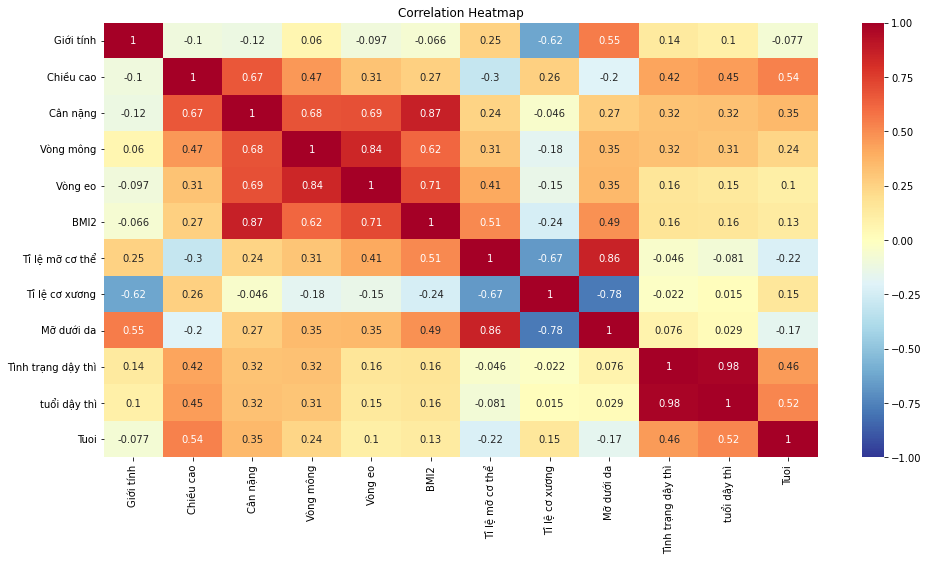

In [262]:
X_Index_People = file[Index_People]
corr = X_Index_People.corr()
print(corr)

#Heatmap of correlations
plt.figure(figsize = (16,8))
sns.heatmap(corr, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = 1)
plt.title('Correlation Heatmap')
plt.savefig("corr.png")

out_excel_path = '/content/drive/MyDrive/Colab Notebooks/Ti_le_mo/Index_People.xlsx'
writer = pd.ExcelWriter(out_excel_path, engine = 'xlsxwriter')
corr.to_excel(writer, sheet_name = 'Corr')
writer.save()
writer.close()

2. Eat_People

In [256]:
X_Eat_People = file[Eat_People]
X_Eat_People['Tỉ lệ mỡ cơ thể'] = file['Tỉ lệ mỡ cơ thể']
print(X_Eat_People.shape)
corr2 = X_Eat_People.corr()
print(corr2)

excel_path = '/content/drive/MyDrive/Colab Notebooks/Ti_le_mo/Eat_People.xlsx'
writer = pd.ExcelWriter(excel_path, engine = 'xlsxwriter')
corr2.to_excel(writer, sheet_name = 'Corr')
writer.save()
writer.close()

(1207, 20)
                                       Tốc độ ăn  ...  Tỉ lệ mỡ cơ thể
Tốc độ ăn                               1.000000  ...         0.025315
Có ăn bữa phụ                           0.035742  ...        -0.070002
Ăn gì trong bữa phụ                     0.025839  ...        -0.034040
Tổng số bữa 1 ngày                      0.063994  ...        -0.064023
Thời điểm ăn bữa phụ                    0.038238  ...         0.019235
Thích ăn rau                           -0.025304  ...         0.039267
Tần suất ăn rau 1 tuần                 -0.007746  ...        -0.046035
Thích ăn trái cây                      -0.029641  ...         0.052728
Tần suất ăn trái cây 1 tuần            -0.010943  ...        -0.072375
Thích thức ăn béo                      -0.014356  ...        -0.034027
Tần suất ăn thức ăn béo 1 tuần         -0.020050  ...         0.030983
Thích thức ăn ngọt                     -0.019615  ...        -0.086497
Tần suất ăn thức ăn ngọt 1 tuần         0.029109  ...         0.08

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/xlsxwriter/workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


3.Sport people

In [257]:
X_Sport_People = file[Sport_People]
X_Sport_People['Tỉ lệ mỡ cơ thể'] = file['Tỉ lệ mỡ cơ thể']
print(X_Sport_People.columns)

Index(['Chơi môn thể thao 1', 'Số buổi chơi thế thao 1 tuần',
       'Chơi môn thể thao 2', 'Số buổi chơi môn 2 trong 1 tuần',
       'Có chơi môn thể thao nặng', 'Số phút chơi thể thao nặng 1 ngày',
       'Số ngày chơi thể thao nặng 1 tuần', 'Có chơi thể thao trung bình',
       'Số phút chơi thể thao trung bình 1 ngày',
       'Số ngày chơi thể thao trung bình 1 tuần', 'Thích vận động',
       'Phương tiện đến trường', 'Số phút đi bộ, xe đạp 1 này',
       'Số ngày đi bộ xe đạp 1 tuần', 'Tỉ lệ mỡ cơ thể'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [258]:
corr3 = X_Sport_People.corr()

excel_path = '/content/drive/MyDrive/Colab Notebooks/Ti_le_mo/Sport_People.xlsx'
writer = pd.ExcelWriter(excel_path, engine = 'xlsxwriter')
corr3.to_excel(writer, sheet_name = 'Corr')
writer.save()
writer.close()


/usr/local/lib/python3.7/dist-packages/xlsxwriter/workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


4.Study_health


In [259]:
X_Study_health = file[Study_health]
X_Study_health['Tỉ lệ mỡ cơ thể'] = file['Tỉ lệ mỡ cơ thể']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [260]:
print(X_Study_health.shape)
corr4 = X_Study_health.corr()

excel_path = '/content/drive/MyDrive/Colab Notebooks/Ti_le_mo/Study_health.xlsx'
writer = pd.ExcelWriter(excel_path, engine = 'xlsxwriter')
corr4.to_excel(writer, sheet_name = 'Corr')
writer.save()
writer.close()


(1207, 17)


/usr/local/lib/python3.7/dist-packages/xlsxwriter/workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
